In [1]:
# code for Glove word embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np  

In [14]:
x = {'bay','beach','bikini','child','cloud','composure','couple','dawn','desert','dune','dusk','evening','fair','weather','flying','freedom','fun','girl','heaven','hot','idyllic','island','lake','landscape','leisure','lifestyle','love','nature','no','person','ocean','people','pet','photograph','recreation','relaxation','sand','sea','seascape','seashore','silhouette','sky','sport','storm','summer','sun','sunset','surf','surfboarding','travel','tropical','turquoise','vacation','water','wave','wind'}
x = {'Taiwan','Kinmen','China','Xiamen','Border','china','taiwan','border','xiamen'}
beachList = ['bay','beach','bikini','child','cloud','composure','couple','dawn','desert','dune','dusk','evening','fair','weather','flying','freedom','fun','girl','heaven','hot','idyllic','island','lake','landscape','leisure','lifestyle','love','nature','no','person','ocean','people','pet','photograph','recreation','relaxation','sand','sea','seascape','seashore','silhouette','sky','sport','storm','summer','sun','sunset','surf','surfboarding','travel','tropical','turquoise','vacation','water','wave','wind']
# create the dict.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)


# number of unique words in dict.
print("Number of unique words in dictionary=", 
      len(tokenizer.word_index))
print("Dictionary is = ", tokenizer.word_index)

Number of unique words in dictionary= 5
Dictionary is =  {'xiamen': 1, 'china': 2, 'taiwan': 3, 'border': 4, 'kinmen': 5}


In [15]:
def embedding_for_vocab(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1
      
    # Adding again 1 because of reserved 0 index
    embedding_matrix_vocab = np.zeros((vocab_size,
                                       embedding_dim))
  
    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix_vocab[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
  
    return embedding_matrix_vocab
  

In [16]:

# matrix for vocab: word_index
embedding_dim = 50
embedding_matrix_vocab = embedding_for_vocab(
    'glove_6B/glove.6B.50d.txt', tokenizer.word_index,
  embedding_dim)
  
print("Dense vector for first word is => \n",
      embedding_matrix_vocab[1])

Dense vector for first word is => 
 [ 1.10529995  0.1076     -1.06210005  1.98880005 -0.59262002 -1.09130001
  0.27937999  0.042013    0.21631999 -0.27799001  0.38661    -0.36161
  1.04970002  0.0040047  -0.36937001  0.10163    -0.91633999  1.04369998
 -0.60789001  1.17229998  1.67990005 -0.80422002 -0.18979999  0.27557999
  0.345      -1.0539      0.53665     0.055128   -0.34358001 -1.25129998
  0.64073002  1.26660001 -0.0052142   0.33028001  0.14511999 -0.55752999
 -0.91426998  1.11319995 -0.59083998  1.58589995 -0.97308999 -0.035412
  1.1868     -0.27879    -0.43694001 -0.62402999  0.25138     0.30256
  0.86570001 -0.23311999]


In [17]:
import pickle

filename = 'glove_6B/glove2word2vec_model.sav'
model = pickle.load(open(filename, 'rb'))


In [18]:
import plotly
import numpy as np
import plotly.graph_objs as go
from sklearn.manifold import TSNE

def display_tsne_scatterplot_3D(model, user_input=None, words=None, label=None, color_map=None, perplexity = 0, learning_rate = 0, iteration = 0, topn=5, sample=10):

    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
    
    word_vectors = np.array([model[w] for w in words])
    
    three_dim = TSNE(n_components = 3, random_state=0, perplexity = perplexity, learning_rate = learning_rate, n_iter = iteration).fit_transform(word_vectors)[:,:3]


    # For 2D, change the three_dim variable into something like two_dim like the following:
    two_dim = TSNE(n_components = 2, random_state=0, perplexity = perplexity, learning_rate = learning_rate, n_iter = iteration).fit_transform(word_vectors)[:,:2]

    data = []


    count = 0
    for i in range (len(user_input)):
                trace = go.Scatter(
                    x = three_dim[count:count+topn,0], 
                    y = three_dim[count:count+topn,1],  
                    #z = three_dim[count:count+topn,2],
                    text = words[count:count+topn],
                    name = user_input[i],
                    textposition = "top center",
                    textfont_size = 20,
                    mode = 'markers+text',
                    marker = {
                        'size': 2,
                        'opacity': 0.8,
                        'color': 2
                    }
       
                )
                
                # For 2D, instead of using go.Scatter3d, we need to use go.Scatter and delete the z variable. Also, instead of using
                # variable three_dim, use the variable that we have declared earlier (e.g two_dim)
            
                data.append(trace)
                count = count+topn

    trace_input = go.Scatter(
                    x = three_dim[count:,0], 
                    y = three_dim[count:,1],  
                    #z = three_dim[count:,2],
                    text = words[count:],
                    name = 'input words',
                    textposition = "top center",
                    textfont_size = 10,
                    mode = 'markers+text',
                    marker = {
                        'size': 2,
                        'opacity': 1,
                        'color': 'black'
                    }
                    )

    # For 2D, instead of using go.Scatter3d, we need to use go.Scatter and delete the z variable.  Also, instead of using
    # variable three_dim, use the variable that we have declared earlier (e.g two_dim)
            
    data.append(trace_input)
    
# Configure the layout

    layout = go.Layout(
        margin = {'l': 0, 'r': 0, 'b': 0, 't': 0},
        showlegend=True,
        legend=dict(
        x=1,
        y=0.5,
        font=dict(
            family="Courier New",
            size=18,
            color="black"
        )),
        font = dict(
            family = " Courier New ",
            size = 5),
        autosize = False,
        width = 1000,
        height = 1000
        )


    plot_figure = go.Figure(data = data, layout = layout)
    plot_figure.show()

In [20]:

def append_list(sim_words, words):
    
    list_of_words = []
    
    for i in range(len(sim_words)):
        sim_words_list = list(sim_words[i])
        sim_words_list.append(words)
        sim_words_tuple = tuple(sim_words_list)
        list_of_words.append(sim_words_tuple)
        
    return list_of_words

beachList = ['bay','beach','bikini','child','cloud','composure','couple','dawn','desert','dune','dusk','evening','fair','weather','flying','freedom','fun','girl','heaven','hot','idyllic','island','lake','landscape','leisure','lifestyle','love','nature','no','person','ocean','people','pet','photograph','recreation','relaxation','sand','sea','seascape','seashore','silhouette','sky','sport','storm','summer','sun','sunset','surf','travel','tropical','turquoise','vacation','water','wave','wind']

input_word = 'taiwan'
user_input = [x.strip() for x in input_word.split(',')]
user_input = []
for i in beachList:
    try:
        user_input.append(i)
    except:
        continue
user_input=['taiwan','kinmen','china','xiamen']

result_word = []
for words in user_input:
        sim_words = model.most_similar(words, topn = 200)
        sim_words = append_list(sim_words, words)
        result_word.extend(sim_words)
        
similar_word = [word[0] for word in result_word]
similarity = [word[1] for word in result_word] 
similar_word.extend(user_input)
labels = [word[2] for word in result_word]
label_dict = dict([(y,x+1) for x,y in enumerate(set(labels))])
color_map = [label_dict[x] for x in labels]

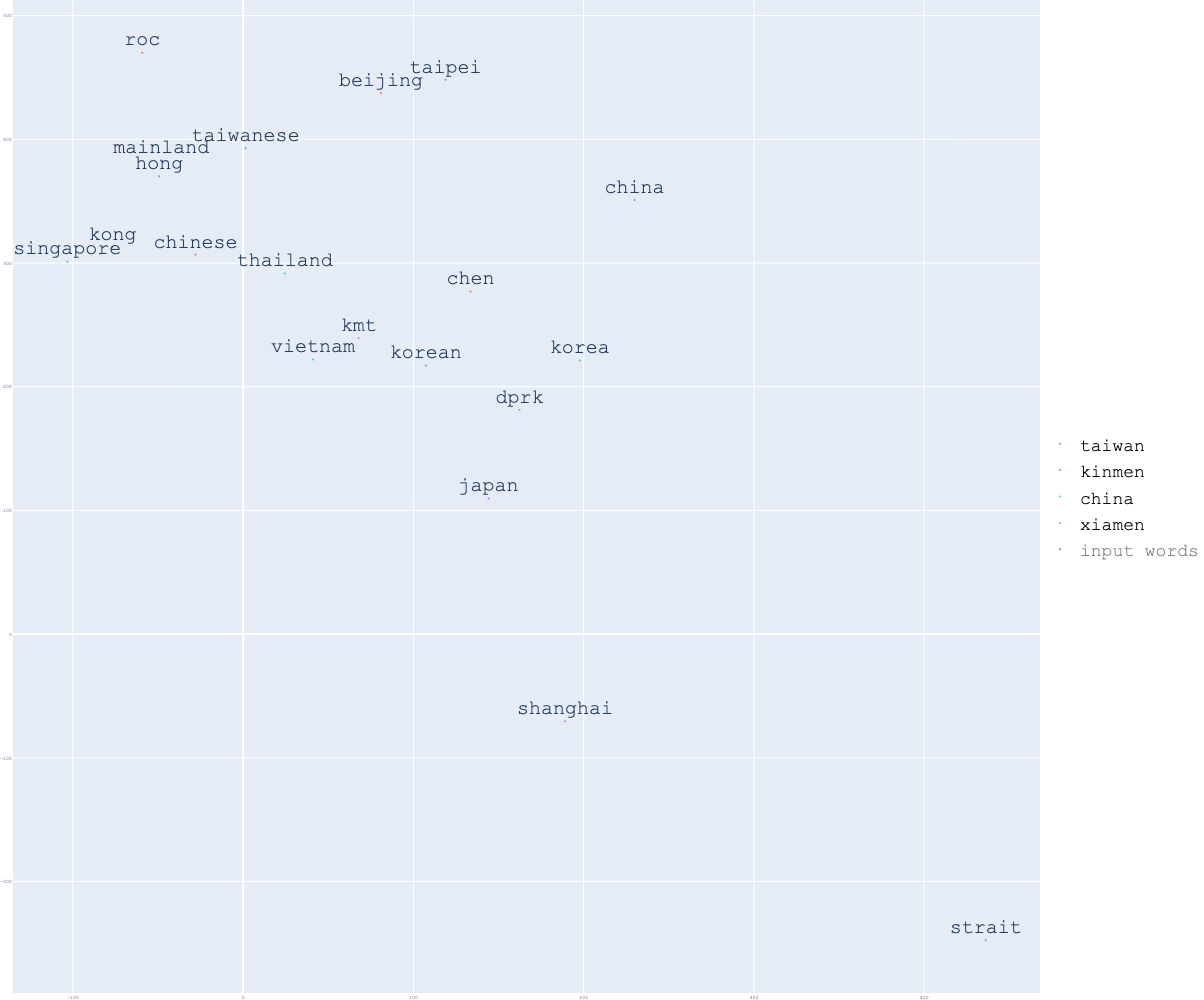

In [21]:
display_tsne_scatterplot_3D(model, user_input, similar_word, labels, color_map, 5, 500, 10000)

In [9]:
' '.join(similar_word)

'bags cardboard bag rubber metal glass foam containers cans coated sheeting bottles wrapped boxes leather discarded stainless paper encased filled cloth gloves ceramic paint fiberglass aluminum wooden shoes steel pvc shiny pieces tubes nylon glasses bottle mattresses polycarbonate soft stuffed corrugated thin molded packaging clothes buckets piece covered bricks clothing containing sheets protective recycled styrofoam plates garbage sheet nails empty colored hand disposable glue canvas sticks fabric oversized wrap trash liquid used materials pink blankets tube plywood box skin bamboo crates tiny knife inside latex thick jars freezer cover candy toilet stones towel belts suitcase masks bed biodegradable resin spray attached wearing coating handmade remove cartons bulky container chairs small pads perforated laminated pipes resealable bearing mattress polyethylene filling pipe fitted scissors trays dust frames mesh pins utensils pile handcuffs strips pots waterproof wrapping using wood f